In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.rand(500,4)
y = np.random.rand(500,3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [8]:
# Semua komputasi pytorch menggunakan tipe tensor
# harus convert ke bentuk tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [9]:
X_train

tensor([[0.1800, 0.4628, 0.9342, 0.2672],
        [0.6215, 0.2972, 0.7039, 0.3789],
        [0.8023, 0.4815, 0.4219, 0.8735],
        ...,
        [0.2467, 0.4935, 0.8679, 0.7873],
        [0.0887, 0.1580, 0.5880, 0.5833],
        [0.1334, 0.2936, 0.2494, 0.5688]])

In [16]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)
test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32)

In [15]:
train_set[:10]

(tensor([[0.1800, 0.4628, 0.9342, 0.2672],
         [0.6215, 0.2972, 0.7039, 0.3789],
         [0.8023, 0.4815, 0.4219, 0.8735],
         [0.4427, 0.3054, 0.6412, 0.5287],
         [0.4717, 0.4284, 0.8788, 0.5322],
         [0.5088, 0.8200, 0.5857, 0.8091],
         [0.9197, 0.5914, 0.3196, 0.7650],
         [0.3544, 0.8592, 0.6782, 0.9191],
         [0.3833, 0.6674, 0.3353, 0.7475],
         [0.7154, 0.6617, 0.3638, 0.4110]]),
 tensor([[0.1443, 0.1973, 0.4698],
         [0.1540, 0.8460, 0.5434],
         [0.8980, 0.8529, 0.5210],
         [0.2427, 0.8946, 0.1266],
         [0.2610, 0.6687, 0.7677],
         [0.0508, 0.2371, 0.1231],
         [0.7309, 0.7260, 0.1840],
         [0.0648, 0.1709, 0.0319],
         [0.4024, 0.3003, 0.7072],
         [0.0884, 0.5730, 0.2454]]))

In [19]:
iterator = iter(trainloader)

In [35]:
next(iterator)

StopIteration: 

# Step 2: Bangun Arsitektur

In [36]:
from torch import nn

In [38]:
nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid(),
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

# Step 3: Training Preparation -> MCO

### Model



In [49]:
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid(),
)

### Criterion

In [41]:
# Fungsi untuk menghitung Loss
criterion = nn.MSELoss() # model diakhiri Linear -> untuk regresi
criterion = nn.NLLLoss() # model diakhiri logsoftmax -> multiclass clf
criterion = nn.BCELoss() # model diakhiri sigmoid -> binary clf, multilabel clf

### Optimizer

In [42]:
# Momentum : diharapkan dapat melawati local minimum
# Rule of Thumb : ADAM atau ADAMW, tetapi tidak harus, ada pilihan lain

In [43]:
from torch import optim

In [45]:
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Step 4: Training Loop

In [48]:
epochs = 500
for i in range(epochs):
    model.train()
    for feature, target in trainloader:
        output = model(feature) # Feedforward
        loss = criterion(output, target)
        loss.backward() # Backpropagation

        optimizer.step() # Update weight
        optimizer.zero_grad() # Syarat pytorch

        print(f"\rEpoch : {i+1}/{epochs}", end=" ")



Epoch : 500/500 

In [50]:
epochs = 500
train_cost = []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) # Feedforward
        loss = criterion(output, target)
        loss.backward() # Backpropagation

        optimizer.step() # Update weight
        optimizer.zero_grad() # Syarat pytorch
        
        cost += loss.item() * feature.shape[0]
    train_cost.append(cost / len(train_set))

    print(f"\rEpoch : {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f}", end=" ")



Epoch :  500/ 500 | train_cost: 0.6989 

In [51]:
import matplotlib.pyplot as plt

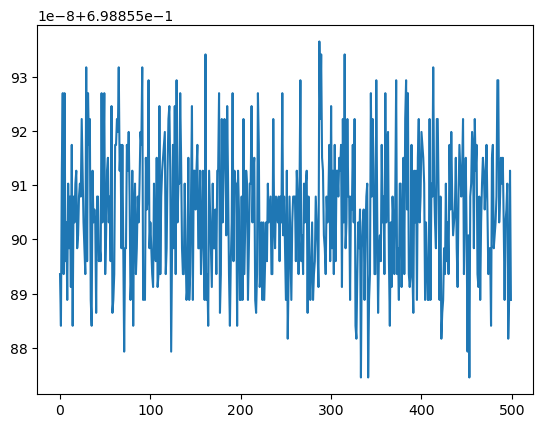

In [52]:
plt.plot(train_cost)